#### SVM的最大特点是能够构造出最大间距的决策边界，从而提高分类算法的鲁棒性

**分割超平面【Separating hyperplane】**  
**间距【margin】**  
**支持向量【support vector】** 

核函数是**特征转换**函数

### 核函数对比

1.线性函数

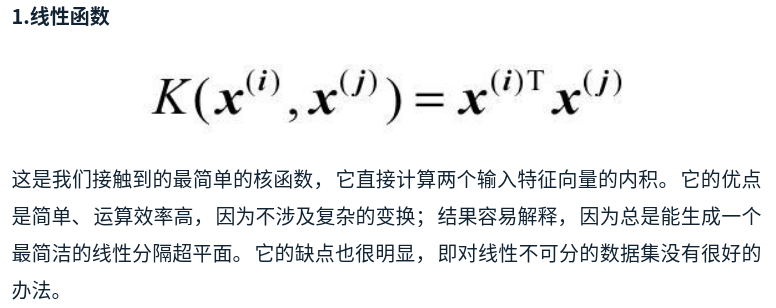

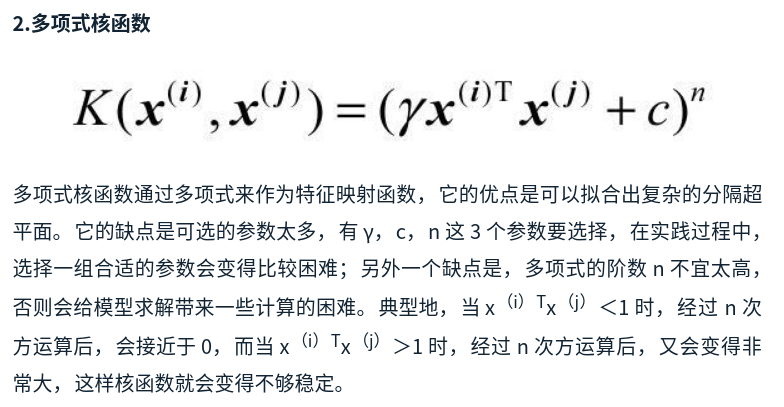

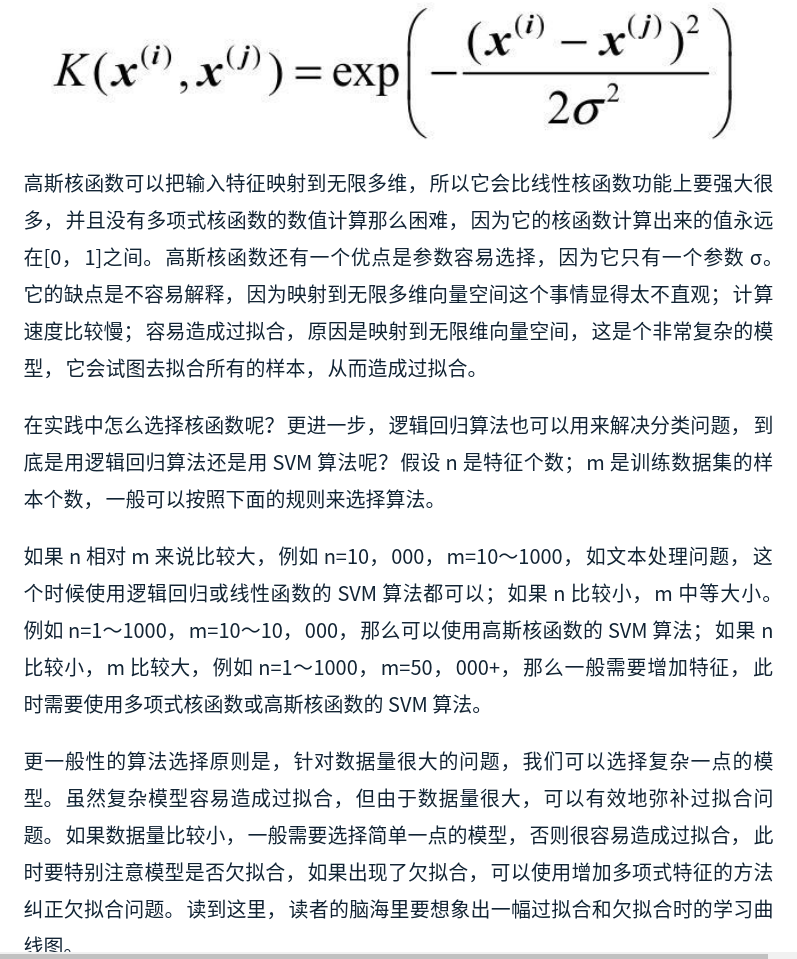

linear:线性函数【C】  
poly：多项式函数【R,C，degree】   
rbf:l高斯函数【C,gamma】

In [2]:
from sklearn import svm
from sklearn.datasets import make_blobs

In [12]:
X,y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.3)

In [15]:
clf = svm.SVC(C=1.0,kernel='linear')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def plot_hyperplane(clf, X, y, 
                    h=0.02, 
                    draw_sv=True, 
                    title='hyperplan'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label])
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')

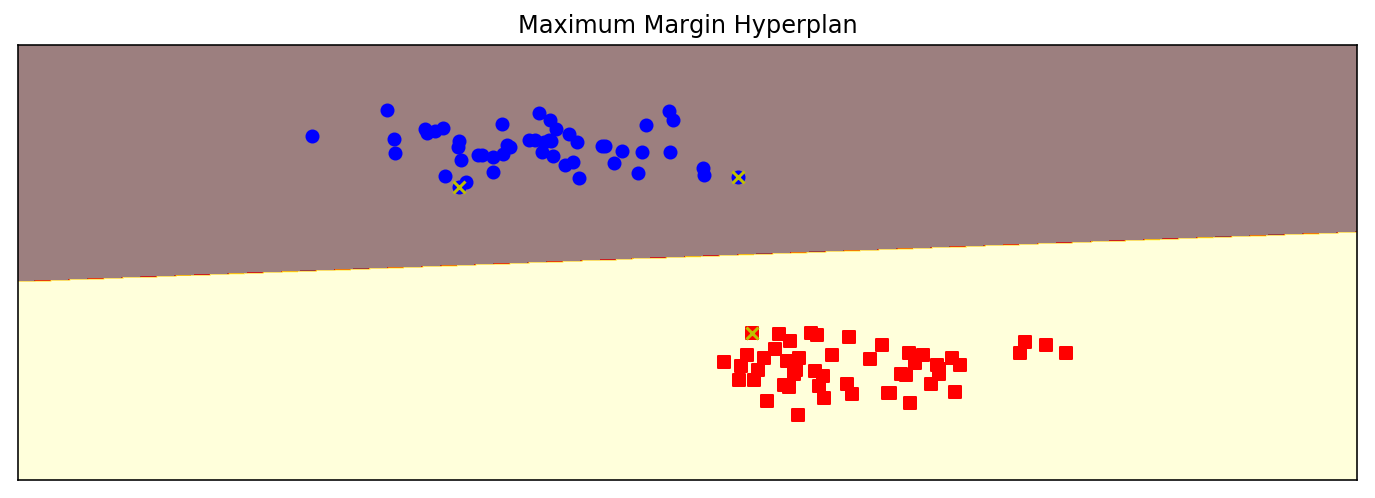

In [22]:
plt.figure(figsize=(12,4),dpi=144)
plot_hyperplane(clf,X,y,h=0.01,title='Maximum Margin Hyperplan')

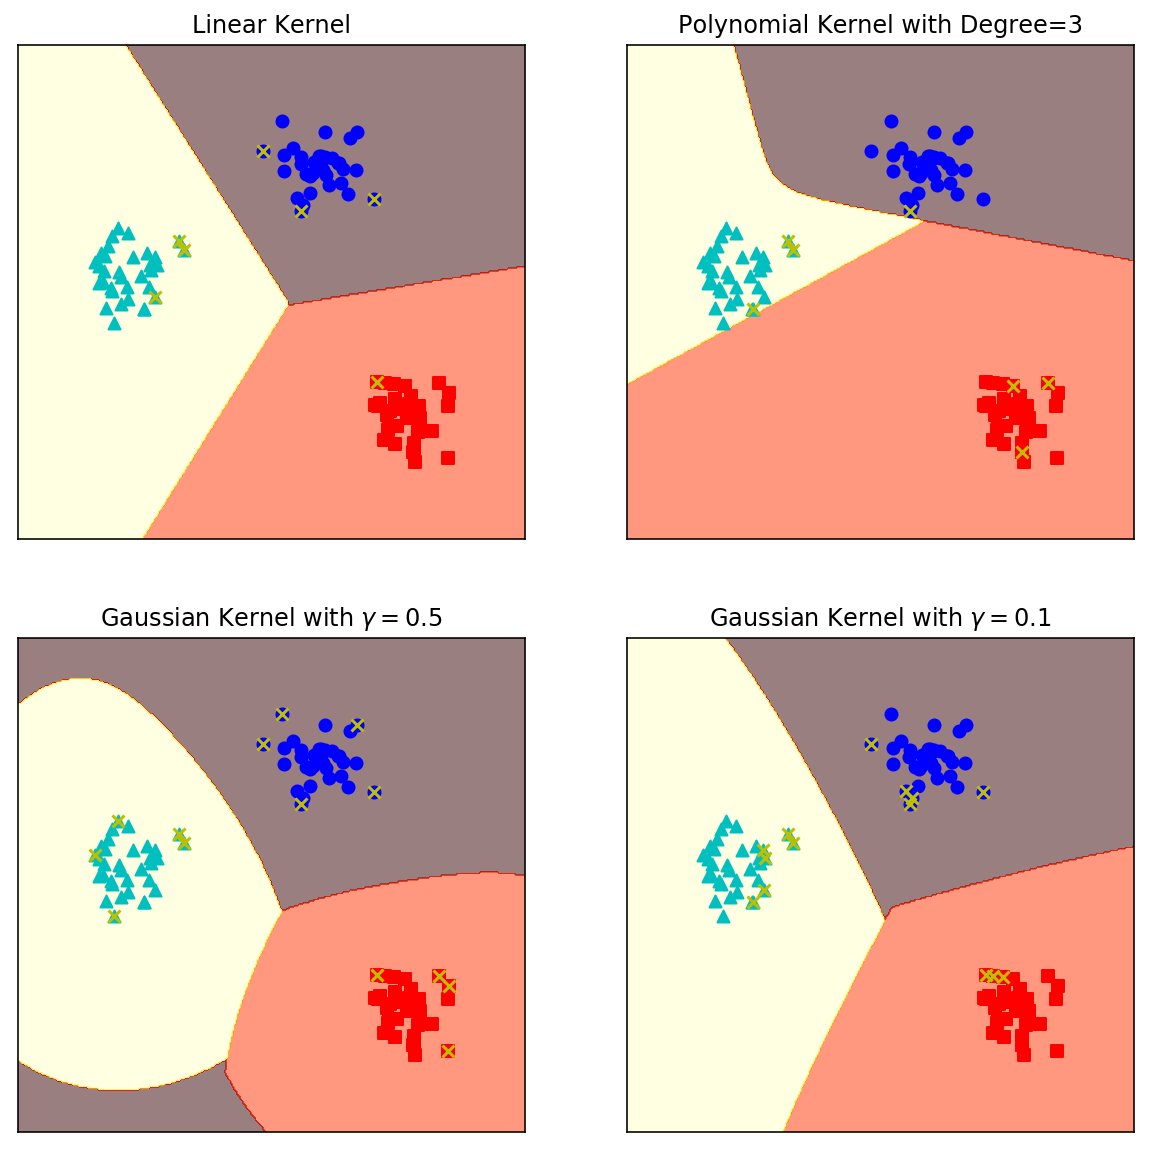

In [27]:
X,y = make_blobs(n_samples=100,centers=3,random_state=0,cluster_std=0.3)


clf_linear = svm.SVC(C=1.0,kernel='linear')
clf_poly = svm.SVC(C=1.0,kernel='poly',degree=30)
clf_rbf = svm.SVC(C=1.0,kernel='rbf',gamma=0.5)
clf_rbf2 = svm.SVC(C=1.0,kernel='rbf',gamma=0.1)

plt.figure(figsize=(10,10),dpi=144)

clfs = [clf_linear,clf_poly,clf_rbf,clf_rbf2]
titles = ['Linear Kernel',
         'Polynomial Kernel with Degree=3',
         'Gaussian Kernel with $\gamma=0.5$',
         'Gaussian Kernel with $\gamma=0.1$']
for clf,i in zip(clfs,range(len(clfs))):
    clf.fit(X,y)
    plt.subplot(2,2,i+1)
    plot_hyperplane(clf,X,y,title=titles[i])